In [1]:
#Compare Shad and Emily's Output
#import external libraries
import pandas as pd
import os
#pd.options.mode.chained_assignment = None  # default='warn'; chained index warning
import numpy as np
import imp
import datetime
import pytz

#plotting
%matplotlib notebook

#import self-written libraries
import LVL1
import LVL2

In [3]:
shad_dat=pd.read_csv(r"Q:\Project Data\GlacierData\Benchmark_Program\Data\Wolverine\AllYears\Wx\LVL2\wolverine_990_hourly_LVL2.csv")
emily_dat=pd.read_csv(r"Q:\Project Data\GlacierData\Benchmark_Program\Data\Wolverine\AllYears\Wx\LVL2\emily\wolverine990_hourly_LVL2.csv")

In [5]:
shadT1=shad_dat.TAspirated1

In [6]:
emilyT1=emily_dat.TAspirated1_USGS

In [9]:
compare=pd.concat([shadT1, emilyT1], axis=1)

<IPython.core.display.Javascript object>


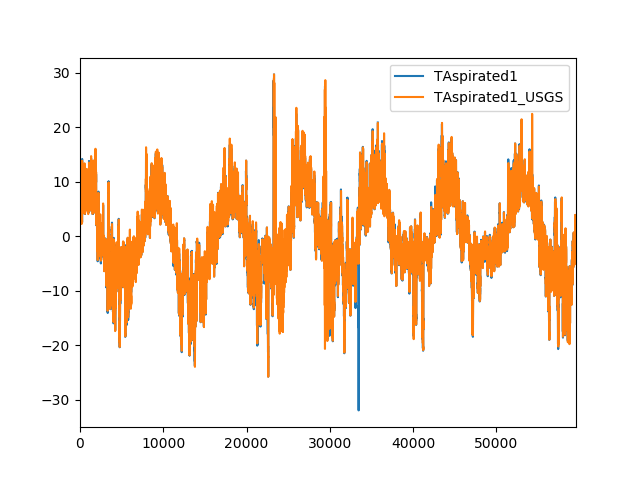

In [10]:
compare.plot()

In [16]:
shad_precip=shad_dat.TPGhourlyCatch
emily_precip=emily_dat.TPGIncremental

<IPython.core.display.Javascript object>


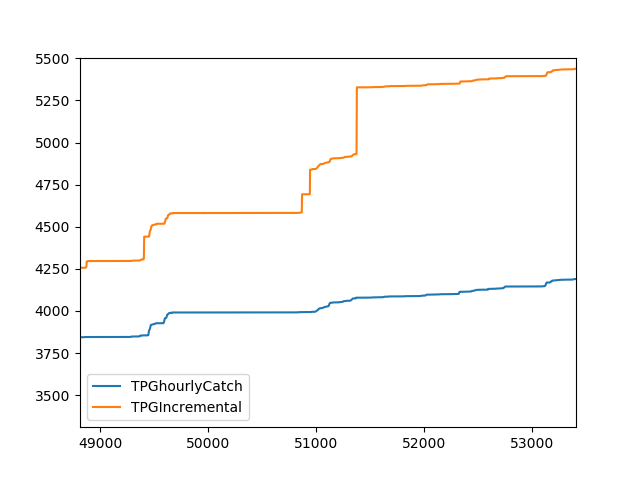

In [19]:
compare=pd.concat([shad_precip, emily_precip], axis=1)
compare.cumsum().plot()

In [20]:
len(shad_dat)

59559

In [21]:
len(emily_dat)

59568